In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


In [4]:
# A
data = np.genfromtxt('Coursework_Data.csv', delimiter=',', skip_header=1)
X = data[:, :2]
y = data[:, 2]

# Handling missing X values
iX = SimpleImputer(missing_values=np.nan, strategy='mean')
X = iX.fit_transform(X)

# Handling missing Y values
iy = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
y = iy.fit_transform(y.reshape(-1, 1)).ravel()

c:\Users\Mrjud\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


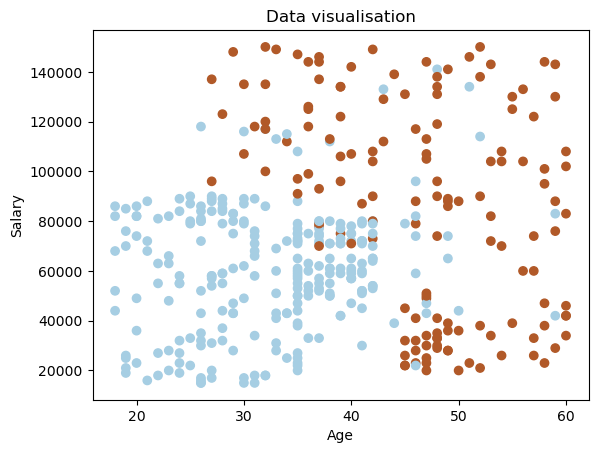

In [3]:
# B
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Data visualisation')
plt.show()

In [4]:
# C
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [6]:
# D
L = -100
M = 2
S = 50
CV = 50
paramGrid = {'C': np.logspace(L, M, S)} # C = 10^L to 10^M with S values
searchGrid = GridSearchCV(SVC(kernel='linear'), paramGrid, cv=CV, n_jobs=-1)  # CV-fold cross-validation
searchGrid.fit(X_train_scaled, y_train)

print("Best parameters: ", searchGrid.best_params_)
print("Best cross-validation score: ", searchGrid.best_score_)


Best parameters:  {'C': 100.0}
Best cross-validation score:  0.8204761904761905


In [110]:
#SVC(C=10000000.0, kernel='linear')

In [7]:
# E
best_C = searchGrid.best_params_['C']
svm = SVC(kernel='linear', C=best_C)
svm.fit(X_train_scaled, y_train)

SVC(C=100.0, kernel='linear')

Test accuracy:  0.8625


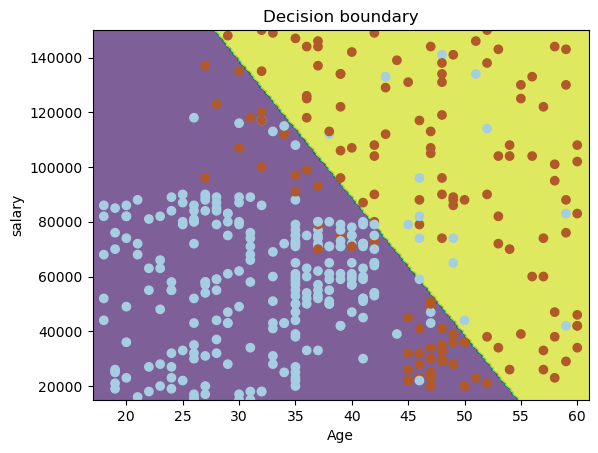

In [8]:
# F
y_pred = svm.predict(X_test_scaled)  # Use X_test_scaled instead of X_test since the data is scaled
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: ", accuracy)

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200))

# Transform the grid for predictions
gp = np.c_[xx.ravel(), yy.ravel()]
gpScaled = scaler.transform(gp)

Z = svm.predict(gpScaled)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Age')
plt.ylabel('salary')
plt.title('Decision boundary')
plt.show()

Best parameters:  {'kernel': 'rbf', 'gamma': 0.26366508987303555, 'degree': 2, 'C': 14.849682622544636}
Best cross-validation score:  0.9133333333333334


In [113]:
#np.logspace(-12, 12, 12) cv=15, 
#Best parameters:  {'C': 6579332246.575656}
#Best cross-validation score:  0.9092352092352094
#Test accuracy:  0.9135802469135802

In [9]:
L = -100
M = 5
S = 50
CV = 50
paramGrid = {'C': np.logspace(L, M, S)} # C = 10^L to 10^M with S values
searchGrid = GridSearchCV(SVC(kernel='rbf'), paramGrid, cv=CV, n_jobs=-1)  # CV-fold cross-validation
searchGrid.fit(X_train_scaled, y_train)

print("Best parameters: ", searchGrid.best_params_)
print("Best cross-validation score: ", searchGrid.best_score_)

Best parameters:  {'C': 5.179474679231139}
Best cross-validation score:  0.9071428571428573


In [10]:

best_C = searchGrid.best_params_['C']
svm = SVC(kernel='rbf', C=best_C)
svm.fit(X_train_scaled, y_train)

SVC(C=5.179474679231139)

Test accuracy (RBF kernel):  0.925


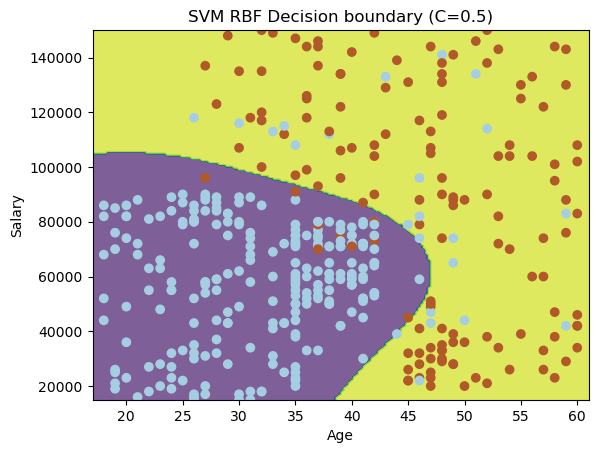

In [13]:
# Train RBF kernel SVM with C=0.5
svmRBF = SVC(kernel='rbf', C=best_C)
svmRBF.fit(X_train_scaled, y_train)  # Use the scaled training data

# Deploy the RBF kernel SVM on the test set
ypredRBF = svmRBF.predict(X_test_scaled)  # Use the scaled test data
accuracyRBF = accuracy_score(y_test, ypredRBF)
print("Test accuracy (RBF kernel): ", accuracyRBF)

# Plot the decision boundary
Zrbf = svmRBF.predict(gpScaled)  # Use the scaled grid for predictions
Zrbf = Zrbf.reshape(xx.shape)

plt.contourf(xx, yy, Zrbf, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('SVM RBF Decision boundary (C=0.5)')
plt.show()

Test accuracy (RBF kernel):  0.9375


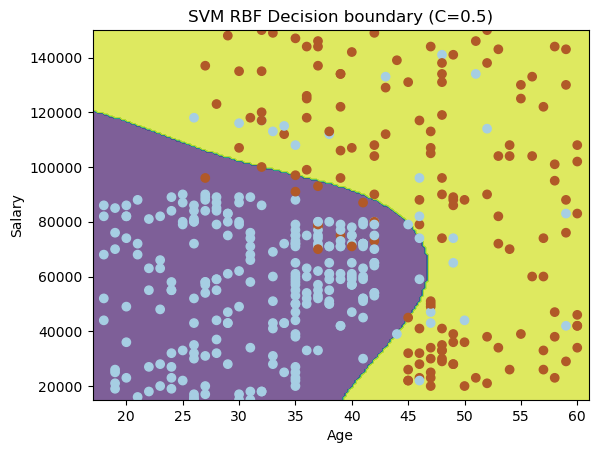

In [12]:
# Train RBF kernel SVM with C=0.5
svmRBF = SVC(kernel='rbf', C=0.5)
svmRBF.fit(X_train_scaled, y_train)  # Use the scaled training data

# Deploy the RBF kernel SVM on the test set
ypredRBF = svmRBF.predict(X_test_scaled)  # Use the scaled test data
accuracyRBF = accuracy_score(y_test, ypredRBF)
print("Test accuracy (RBF kernel): ", accuracyRBF)

# Plot the decision boundary
Zrbf = svmRBF.predict(gpScaled)  # Use the scaled grid for predictions
Zrbf = Zrbf.reshape(xx.shape)

plt.contourf(xx, yy, Zrbf, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('SVM RBF Decision boundary (C=0.5)')
plt.show()


In [115]:
# D
best_C = 1
svm = SVC(kernel='linear', C=best_C)
svm.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear')

Test accuracy:  0.8625


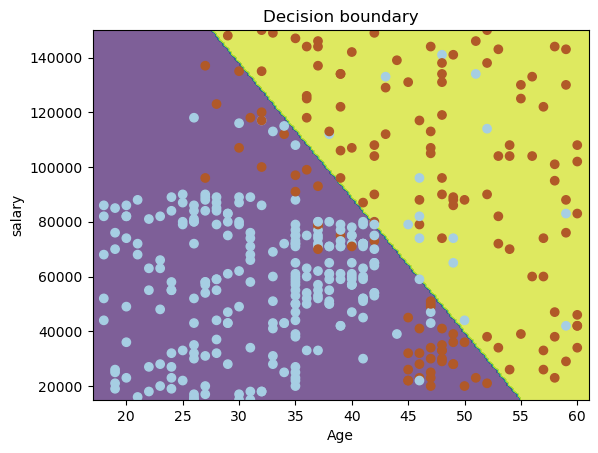

In [116]:
# F
y_pred = svm.predict(X_test_scaled)  # Use X_test_scaled instead of X_test since the data is scaled
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: ", accuracy)

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200))

# Transform the grid for predictions
gp = np.c_[xx.ravel(), yy.ravel()]
gpScaled = scaler.transform(gp)

Z = svm.predict(gpScaled)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Age')
plt.ylabel('salary')
plt.title('Decision boundary')
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [14]:
# A
data = np.genfromtxt('Coursework_Data.csv', delimiter=',', skip_header=1)
X = data[:, :2]
y = data[:, 2]

# Handling missing X values
imputer_X = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer_X.fit_transform(X)

# Handling missing Y values
imputer_y = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
y = imputer_y.fit_transform(y.reshape(-1, 1)).ravel()

c:\Users\Mrjud\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [15]:
# C
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [16]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [17]:
# D
L = -10
M = 6
S = 30
CV = 10
paramGrid = {'C': np.logspace(L, M, S)} # C = 10^L to 10^M with S values
searchGrid = GridSearchCV(SVC(kernel='rbf'), paramGrid, cv=CV, n_jobs=-1)  # CV-fold cross-validation
searchGrid.fit(X_train_scaled, y_train)

print("Best parameters: ", searchGrid.best_params_)
print("Best cross-validation score: ", searchGrid.best_score_)

Best parameters:  {'C': 0.8531678524172814}
Best cross-validation score:  0.90625


In [18]:
# E
best_C = searchGrid.best_params_['C']
svm = SVC(kernel='linear', C=best_C)
svm.fit(X_train_scaled, y_train)

SVC(C=0.8531678524172814, kernel='linear')

Test accuracy:  0.8


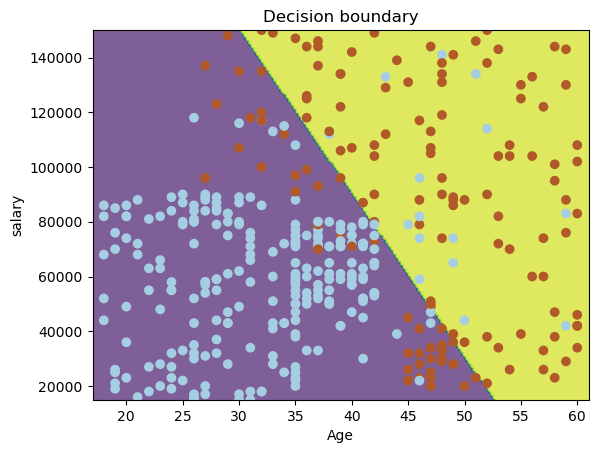

In [19]:
# F
y_pred = svm.predict(X_test_scaled)  # Use X_test_scaled instead of X_test since the data is scaled
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: ", accuracy)

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200))

# Transform the grid for predictions
gp = np.c_[xx.ravel(), yy.ravel()]
gpScaled = scaler.transform(gp)

Z = svm.predict(gpScaled)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Age')
plt.ylabel('salary')
plt.title('Decision boundary')
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# A
data = np.genfromtxt('Coursework_Data.csv', delimiter=',', skip_header=1)
X = data[:, :2]
y = data[:, 2]

# Handling missing X values
imputer_X = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer_X.fit_transform(X)

# Handling missing Y values
imputer_y = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
y = imputer_y.fit_transform(y.reshape(-1, 1)).ravel()

# Initialize variables
best_accuracy = 0
best_C = 0
best_random_state = 0
best_cross_val_score = 0
best_cross_val_iteration = 0
best_model = None  # Initialize best_model variable

# Iterate through random_state values
for random_state in range(1, 10):
    # C
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Scaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
    X_test_scaled = scaler.transform(X_test.astype(np.float32))

    # D
  #  paramGrid = {'C': np.logspace(-10, 4, 10)}
   # searchGrid = GridSearchCV(SVC(kernel='linear'), paramGrid, cv=5, n_jobs=-1)
   # searchGrid.fit(X_train_scaled, y_train)

    # Update best cross-validation score and corresponding iteration
    if searchGrid.best_score_ > best_cross_val_score:
        best_cross_val_score = searchGrid.best_score_
        best_cross_val_iteration = random_state

    # E
    current_best_C = searchGrid.best_params_['C']
    svm = SVC(kernel='linear', C=current_best_C)
    svm.fit(X_train_scaled, y_train)

    # F
    y_pred = svm.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    # Update best accuracy and corresponding C, random_state, and model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = current_best_C
        best_random_state = random_state
        best_model = svm  # Update best_model

# Print best accuracy, C, random_state, cross-validation score, and iteration
print("Best Test Accuracy: ", best_accuracy)
print("Best C: ", best_C)
print("Best Random State: ", best_random_state)
print("Best Cross-Validation Score: ", best_cross_val_score)
print("Best Cross-Validation Score Iteration: ", best_cross_val_iteration)


 

                    


c:\Users\Mrjud\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Best Test Accuracy:  0.9
Best C:  7.742636826811277
Best Random State:  4
Best Cross-Validation Score:  0.859375
Best Cross-Validation Score Iteration:  6


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# A
data = np.genfromtxt('Coursework_Data.csv', delimiter=',', skip_header=1)
X = data[:, :2]
y = data[:, 2]

# C
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

from sklearn.preprocessing import StandardScaler
# Create the scaler
scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

# E
best_C =7.742636826811277
#best_C = searchGrid.best_params_['C']
svm = SVC(kernel='linear', C=best_C)
svm.fit(X_train_scaled, y_train)



SVC(C=7.742636826811277, kernel='linear')

Test accuracy:  0.8


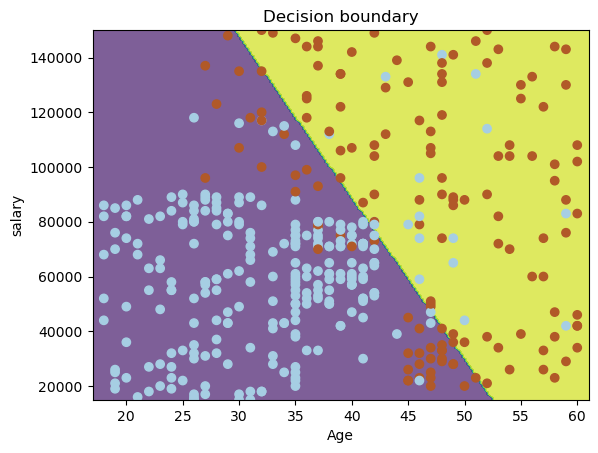

In [25]:
y_pred = svm.predict(X_test_scaled)  # Use X_test_scaled instead of X_test since the data is scaled
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: ", accuracy)

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200))

# Transform the grid for predictions
gp = np.c_[xx.ravel(), yy.ravel()]
gpScaled = scaler.transform(gp)

Z = svm.predict(gpScaled)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Age')
plt.ylabel('salary')
plt.title('Decision boundary')
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
best_C =7.742636826811277
# A
data = np.genfromtxt('Coursework_Data.csv', delimiter=',', skip_header=1)
X = data[:, :2]
y = data[:, 2]

# Handling missing X values
imputer_X = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer_X.fit_transform(X)

# Handling missing Y values
imputer_y = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
y = imputer_y.fit_transform(y.reshape(-1, 1)).ravel()

worst_test_accuracy = 1
worst_cross_val_score = 1
best_test_accuracy = 0
best_cross_val_score = 0
worst_test_random_state = 0
worst_cross_val_random_state = 0
best_test_random_state = 0
best_cross_val_random_state = 0

for random_state in range(1, 100000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
    X_test_scaled = scaler.transform(X_test.astype(np.float32))
    
    #svm = SVC(kernel='linear', C=best_C)
    svm = SVC(kernel='rbf', C=best_C)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy < worst_test_accuracy:
        worst_test_accuracy = accuracy
        worst_test_random_state = random_state

    if accuracy > best_test_accuracy:
        best_test_accuracy = accuracy
        best_test_random_state = random_state

    searchGrid = GridSearchCV(SVC(kernel='rbf'), {'C': [best_C]}, cv=5, n_jobs=-1)
    #searchGrid = GridSearchCV(SVC(kernel='linear'), {'C': [best_C]}, cv=5, n_jobs=-1)
    searchGrid.fit(X_train_scaled, y_train)
    cross_val_score = searchGrid.best_score_
    
    if cross_val_score < worst_cross_val_score:
        worst_cross_val_score = cross_val_score
        worst_cross_val_random_state = random_state

    if cross_val_score > best_cross_val_score:
        best_cross_val_score = cross_val_score
        best_cross_val_random_state = random_state

print("Worst Test Accuracy: ", worst_test_accuracy)
print("Worst Test Accuracy Random State: ", worst_test_random_state)
print("Worst Cross-Validation Score: ", worst_cross_val_score)
print("Worst Cross-Validation Score Random State: ", worst_cross_val_random_state)
print("Best Test Accuracy: ", best_test_accuracy)
print("Best Test Accuracy Random State: ", best_test_random_state)
print("Best Cross-Validation Score: ", best_cross_val_score)
print("Best Cross-Validation Score Random State: ", best_cross_val_random_state)


c:\Users\Mrjud\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Worst Test Accuracy:  0.7625
Worst Test Accuracy Random State:  36945
Worst Cross-Validation Score:  0.865625
Worst Cross-Validation Score Random State:  71021
Best Test Accuracy:  1.0
Best Test Accuracy Random State:  1534
Best Cross-Validation Score:  0.959375
Best Cross-Validation Score Random State:  10209
